In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import SimpleImputer

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
train = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
test = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")

print("train :", train.shape)
print("test :", test.shape)
train.head()

train : (8693, 14)
test : (4277, 13)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [5]:
# 수치형은 평균으로 대체
for df in [train,test]:    
    for col in ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
        df[col] = df[col].fillna(df[col].median())

# 범주형은 최빈값으로 대체
    for col in ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']:
        df[col] = df[col].fillna(df[col].mode()[0])


/tmp/ipykernel_14/2676156869.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8693 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(3), float64(6), object(5)
memory usage: 772.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4277 non-null   object 
 2   CryoSleep     4277 non-null   bool   
 3   Cabin         4277 non-null   object 
 4   Destination   4277 non-null   object 
 5   Age           4277 non-null   float64
 6   VIP           4277 non-null   bool   
 7   RoomService   4277 non-null   float64
 8   FoodCourt     4277 non-null   float64
 9   ShoppingMall  4277 non-null   float64
 10  Spa           4277 non-null   float64
 11  VRDeck        4277 non-null   float64
 12  Name          4277 non-null   object 
dtypes: bool(2), float64(6), object(5)
memory usage: 376.0+ KB


In [8]:
X = pd.concat([train.drop("Transported", axis=1),test],axis=0)
y = train[["Transported"]]

In [9]:
split = X["PassengerId"].apply(lambda x: x.split("_"))
X["Idgrp"] = split.map(lambda x: x[1])
X["PassengerId of Idgrp"] = split.map(lambda x: x[0])

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12970 entries, 0 to 4276
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PassengerId           12970 non-null  object 
 1   HomePlanet            12970 non-null  object 
 2   CryoSleep             12970 non-null  bool   
 3   Cabin                 12970 non-null  object 
 4   Destination           12970 non-null  object 
 5   Age                   12970 non-null  float64
 6   VIP                   12970 non-null  bool   
 7   RoomService           12970 non-null  float64
 8   FoodCourt             12970 non-null  float64
 9   ShoppingMall          12970 non-null  float64
 10  Spa                   12970 non-null  float64
 11  VRDeck                12970 non-null  float64
 12  Name                  12970 non-null  object 
 13  Idgrp                 12970 non-null  object 
 14  PassengerId of Idgrp  12970 non-null  object 
dtypes: bool(2), float64(6), o

In [11]:
X.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Idgrp,PassengerId of Idgrp
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,01,0001
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,01,0002
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,01,0003
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,02,0003
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,01,0004


In [12]:
numeric_ = X.select_dtypes(exclude=['object'])
numeric_.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck'],
      dtype='object')

In [13]:
cat_train = X.select_dtypes(include=['object']).copy()
cat_train.columns

Index(['PassengerId', 'HomePlanet', 'Cabin', 'Destination', 'Name', 'Idgrp',
       'PassengerId of Idgrp'],
      dtype='object')

/tmp/ipykernel_14/2745736105.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numeric_.loc[:,col].dropna(), kde=False)


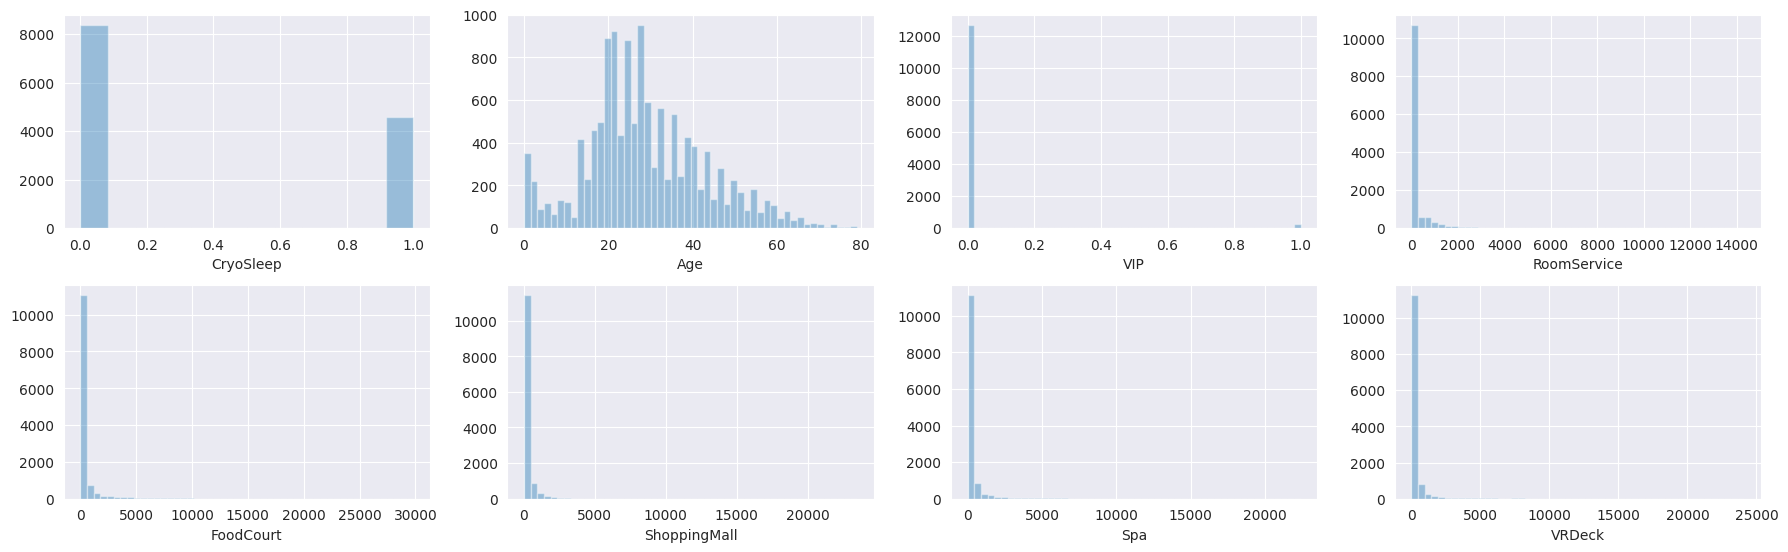

In [14]:
fig = plt.figure(figsize=(18,16))
for index,col in enumerate(numeric_):
    plt.subplot(6,4,index+1)
    sns.distplot(numeric_.loc[:,col].dropna(), kde=False)
fig.tight_layout(pad=1.0)

In [15]:
for col in numeric_:
    print(numeric_[col].value_counts())
    print("\n")

CryoSleep
False    8389
True     4581
Name: count, dtype: int64


Age
27.0    565
18.0    496
26.0    491
24.0    482
21.0    468
       ... 
75.0      6
79.0      5
78.0      4
77.0      3
76.0      2
Name: count, Length: 80, dtype: int64


VIP
False    12697
True       273
Name: count, dtype: int64


RoomService
0.0       8566
1.0        185
2.0        113
3.0         89
4.0         71
          ... 
263.0        1
271.0        1
922.0        1
3905.0       1
652.0        1
Name: count, Length: 1578, dtype: int64


FoodCourt
0.0        8435
1.0         175
2.0         105
4.0          75
3.0          74
           ... 
2853.0        1
9495.0        1
342.0         1
11552.0       1
601.0         1
Name: count, Length: 1953, dtype: int64


ShoppingMall
0.0       8637
1.0        225
2.0        112
3.0         94
4.0         69
          ... 
751.0        1
1573.0       1
1541.0       1
1661.0       1
3851.0       1
Name: count, Length: 1367, dtype: int64


Spa
0.0       8219
1.0       

In [16]:
#분할 후에만
#train = train.drop(train[train['RoomService'] > 8500].index)
#train = train.drop(train[train['FoodCourt'] > 25000].index)
#train = train.drop(train[train['ShoppingMall'] > 15000].index)
#train = train.drop(train[train['Spa'] > 155000].index)

In [17]:
X.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Idgrp,PassengerId of Idgrp
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,01,0001
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,01,0002
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,01,0003
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,02,0003
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,01,0004


In [18]:
for col in cat_train:
    print(cat_train[col].value_counts())
    print("\n")

PassengerId
0001_01    1
9227_03    1
9220_01    1
9220_02    1
9220_03    1
          ..
4610_01    1
4611_01    1
4612_01    1
4613_01    1
9277_01    1
Name: count, Length: 12970, dtype: int64


HomePlanet
Earth     7153
Europa    3133
Mars      2684
Name: count, dtype: int64


Cabin
G/734/S     207
G/160/P     108
C/21/P        7
G/748/S       7
D/273/S       7
           ... 
E/317/P       1
F/1039/P      1
F/1038/P      1
C/158/P       1
G/1498/S      1
Name: count, Length: 9825, dtype: int64


Destination
TRAPPIST-1e      9145
55 Cancri e      2641
PSO J318.5-22    1184
Name: count, dtype: int64


Name
Alraium Disivering    202
Berta Barnolderg       96
Carry Contrevins        2
Ankalik Nateansive      2
Gabria Batestonley      2
                     ... 
Sadrix Repumparte       1
Giamon Gelle            1
Mothab Ineedeve         1
Naosa Ineedeve          1
Lilace Leonzaley        1
Name: count, Length: 12629, dtype: int64


Idgrp
01    9280
02    2135
03     840
04     338
05  

<Axes: >

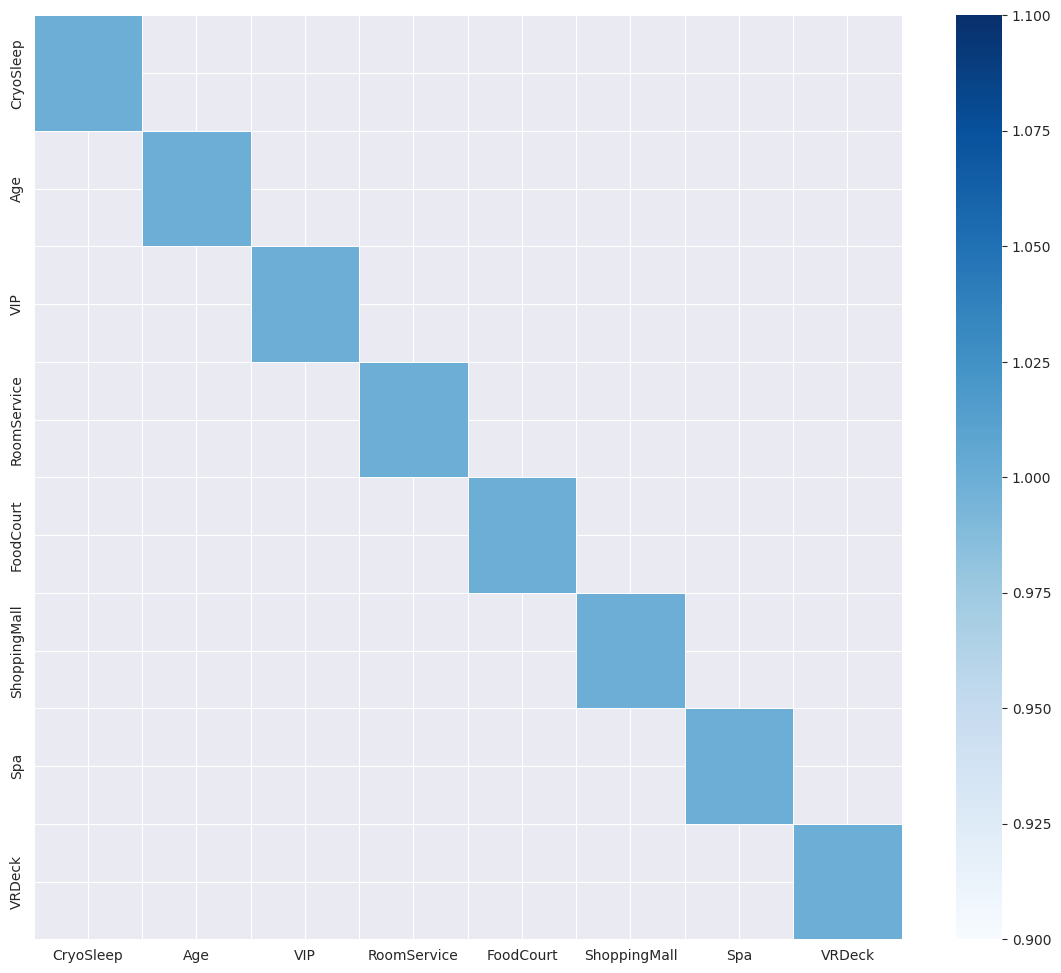

In [19]:
plt.figure(figsize=(14,12))
correlation = numeric_.corr()
sns.heatmap(correlation, mask = correlation <0.8, linewidth=0.5, cmap='Blues')

In [20]:
numeric_train = train.select_dtypes(exclude=['object'])
correlation = numeric_train.corr()
correlation[['Transported']].sort_values(['Transported'], ascending=False)

,Transported
Transported,1.000000
CryoSleep,0.460132
FoodCourt,0.045583
ShoppingMall,0.009391
VIP,-0.037261
Age,-0.074233
VRDeck,-0.204874
Spa,-0.218545
RoomService,-0.241124


In [21]:
X.head

<bound method NDFrame.head of      PassengerId HomePlanet  CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa      False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth      False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa      False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa      False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth      False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...        ...       ...            ...   ...    ...   
4272     9266_02      Earth       True  G/1496/S    TRAPPIST-1e  34.0  False   
4273     9269_01      Earth      False   G/160/P    TRAPPIST-1e  42.0  False   
4274     9271_01       Mars       True   D/296/P    55 Cancri e  26.0  False   
4275     9273_01     Europa      False   D/297/P    TRAPPIST-1e  26.0  False   
4276     9277_01      Earth       True  G/1498/S  PSO J318.5-22  43.0  False   

      Roo

In [22]:
# 의미있는 조합 특성들
def create_meaningful_features(df):
    # 총 서비스 이용 개수
    df['total_services'] = (df['RoomService_bin'] + df['FoodCourt_bin'] + 
                           df['ShoppingMall_bin'] + df['Spa_bin'] + df['VRDeck_bin'])
    
    # 엔터테인먼트 vs 생활 서비스
    df['entertainment'] = df['VRDeck_bin'] + df['Spa_bin']
    df['daily_services'] = df['RoomService_bin'] + df['FoodCourt_bin']
    
    # 프리미엄 이용 패턴
    df['premium_user'] = (df['VIP'] * df['total_services']).astype(int)

    # 비선형 특성 추가
    df['Age_squared'] = df['Age'] ** 2
    df['Age_cubed'] = df['Age'] ** 3
    df['Age_log'] = np.log1p(df['Age'])

    # 구간별 상호작용
    df['Age_VIP_interaction'] = df['Age'] * df['VIP']
    df['Age_Services_interaction'] = df['Age'] * df['total_services']

    df["GroupSize"] = df["Idgrp"].map(df["Idgrp"].value_counts())
    # 더 복잡한 상호작용 특성
    df['Age_Group_Service_pattern'] = df['Age'] * df['GroupSize'] * df['total_services']

    # 원본 연속형 서비스 데이터도 함께 활용
    df['Age_RoomService_ratio'] = df['Age'] / (df['RoomService'] + 1)

    
    

    # 1. Cabin 구조 분리
    

    # 3. 조합 피처 만들기
    df["Deck_Side"] = df["Deck"] + "_" + df["Side"]
    # 스플라인 기법 적용
    from sklearn.preprocessing import SplineTransformer
    spline = SplineTransformer(n_knots=4, degree=3)
    age_spline = spline.fit_transform(df[['Age']])
    
    return df



In [23]:
# 데이터 전처리 단계에서 구분
def preprocess_data(df):
    # 1. 원본 데이터 복사 보존
    df_processed = df.copy()
    
    # 2. 이진 변수 생성
    service_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
    for col in service_cols:
        df_processed[f'{col}_bin'] = (df_processed[col] > 0).astype(int)

    df_processed["Idgrp"] = df_processed["PassengerId"].apply(lambda x: x.split("_")[1])
    df_processed[["Deck", "Side"]] = df_processed["Cabin"].str.split("/", expand=True).iloc[:, [0, 2]]
    # 3. 의미있는 특성 생성
    df_processed = create_meaningful_features(df_processed)
    
    # 4. 최종 모델링을 위한 특성 선택
    # 원본 연속형 변수들은 특정 특성 생성에만 사용하고 제거
    features_to_drop = ["PassengerId",'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Name','Age','Cabin','PassengerId of Idgrp','Idgrp']
    df_final = df_processed.drop(columns=features_to_drop)
    
    return df_final

X = preprocess_data(X)

In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12970 entries, 0 to 4276
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   HomePlanet                 12970 non-null  object 
 1   CryoSleep                  12970 non-null  bool   
 2   Destination                12970 non-null  object 
 3   VIP                        12970 non-null  bool   
 4   RoomService_bin            12970 non-null  int64  
 5   FoodCourt_bin              12970 non-null  int64  
 6   ShoppingMall_bin           12970 non-null  int64  
 7   Spa_bin                    12970 non-null  int64  
 8   VRDeck_bin                 12970 non-null  int64  
 9   Deck                       12970 non-null  object 
 10  Side                       12970 non-null  object 
 11  total_services             12970 non-null  int64  
 12  entertainment              12970 non-null  int64  
 13  daily_services             12970 non-null  int64  
 

In [25]:
# 1. 인코딩할 컬럼만 지정
cols_to_encode = ['HomePlanet', 'Destination','Deck','Side','Deck_Side']

# 2. 해당 컬럼만 원핫 인코딩
X_encoded = pd.get_dummies(X[cols_to_encode], drop_first=True)

# 3. 원본에서 해당 컬럼 제거
X_rest = X.drop(columns=cols_to_encode)

# 4. 합치기
X = pd.concat([X_rest, X_encoded], axis=1)

In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12970 entries, 0 to 4276
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  12970 non-null  bool   
 1   VIP                        12970 non-null  bool   
 2   RoomService_bin            12970 non-null  int64  
 3   FoodCourt_bin              12970 non-null  int64  
 4   ShoppingMall_bin           12970 non-null  int64  
 5   Spa_bin                    12970 non-null  int64  
 6   VRDeck_bin                 12970 non-null  int64  
 7   total_services             12970 non-null  int64  
 8   entertainment              12970 non-null  int64  
 9   daily_services             12970 non-null  int64  
 10  premium_user               12970 non-null  int64  
 11  Age_squared                12970 non-null  float64
 12  Age_cubed                  12970 non-null  float64
 13  Age_log                    12970 non-null  float64
 

In [27]:
# 제거해야 할 특성들
redundant_features = [
    # Deck_Side 조합들 (모두 제거)
    'Deck_Side_A_S', 'Deck_Side_B_P', 'Deck_Side_B_S', 
    'Deck_Side_C_P', 'Deck_Side_C_S', 'Deck_Side_D_P', 
    'Deck_Side_D_S', 'Deck_Side_E_P', 'Deck_Side_E_S',
    'Deck_Side_F_P', 'Deck_Side_F_S', 'Deck_Side_G_P',
    'Deck_Side_G_S', 'Deck_Side_T_P', 'Deck_Side_T_S',
    
    # 하나의 Side 정보만 남기기 (Side_S만 유지, Side_P는 제거)
    # 또는 Deck 중 하나 제거 (예: Deck_T는 특수 구역이므로 유지)
]

# 정리된 특성 세트
clean_features = [col for col in X.columns if col not in redundant_features]
X = X[clean_features]

In [28]:
# PCA로 Deck 정보 압축
from sklearn.decomposition import PCA
deck_features = ['Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T']
pca = PCA(n_components=3)  # 7개 → 3개로 압축
deck_pca = pca.fit_transform(X[deck_features])

In [29]:
# deck_pca는 넘파이 배열이므로 → DataFrame으로 변환
deck_pca_df = pd.DataFrame(deck_pca, columns=['DeckPCA1', 'DeckPCA2', 'DeckPCA3'], index=X.index)

# 기존 deck 관련 컬럼 제거 (선택 사항)
X = X.drop(columns=deck_features)

# PCA 결과 병합
X = pd.concat([X, deck_pca_df], axis=1)

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12970 entries, 0 to 4276
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  12970 non-null  bool   
 1   VIP                        12970 non-null  bool   
 2   RoomService_bin            12970 non-null  int64  
 3   FoodCourt_bin              12970 non-null  int64  
 4   ShoppingMall_bin           12970 non-null  int64  
 5   Spa_bin                    12970 non-null  int64  
 6   VRDeck_bin                 12970 non-null  int64  
 7   total_services             12970 non-null  int64  
 8   entertainment              12970 non-null  int64  
 9   daily_services             12970 non-null  int64  
 10  premium_user               12970 non-null  int64  
 11  Age_squared                12970 non-null  float64
 12  Age_cubed                  12970 non-null  float64
 13  Age_log                    12970 non-null  float64
 

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8693 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(3), float64(6), object(5)
memory usage: 772.7+ KB


In [32]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4277 non-null   object 
 2   CryoSleep     4277 non-null   bool   
 3   Cabin         4277 non-null   object 
 4   Destination   4277 non-null   object 
 5   Age           4277 non-null   float64
 6   VIP           4277 non-null   bool   
 7   RoomService   4277 non-null   float64
 8   FoodCourt     4277 non-null   float64
 9   ShoppingMall  4277 non-null   float64
 10  Spa           4277 non-null   float64
 11  VRDeck        4277 non-null   float64
 12  Name          4277 non-null   object 
dtypes: bool(2), float64(6), object(5)
memory usage: 376.0+ KB


In [33]:
n_test = len(test)
n_train = len(train)

In [34]:
X_train = X.iloc[:n_train].reset_index(drop=True)
X_test = X.iloc[n_train:].reset_index(drop=True)

In [35]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   bool   
 1   VIP                        8693 non-null   bool   
 2   RoomService_bin            8693 non-null   int64  
 3   FoodCourt_bin              8693 non-null   int64  
 4   ShoppingMall_bin           8693 non-null   int64  
 5   Spa_bin                    8693 non-null   int64  
 6   VRDeck_bin                 8693 non-null   int64  
 7   total_services             8693 non-null   int64  
 8   entertainment              8693 non-null   int64  
 9   daily_services             8693 non-null   int64  
 10  premium_user               8693 non-null   int64  
 11  Age_squared                8693 non-null   float64
 12  Age_cubed                  8693 non-null   float64
 13  Age_log                    8693 non-null   float

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 모델 정의 (liblinear: 작은 데이터셋에 적합)
model = LogisticRegression(max_iter=1000, solver='liblinear')

# 학습
model.fit(X_train, y)

# 예측
logi_y_pred = model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# 모델 정의
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# 학습
model.fit(X_train, y)

# 예측
xgb_y_pred = model.predict(X_test)

# 정확도 평가 (필요 시)
# accuracy = accuracy_score(y_true, y_pred)

In [38]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

# 모델 정의
model = LGBMClassifier(random_state=42)

# 학습
model.fit(X_train, y)

# 예측
lgb_y_pred = model.predict(X_test)

# 정확도 평가 (필요 시)
# accuracy = accuracy_score(y_true, y_pred)


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4378, number of negative: 4315
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003370 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1026
[LightGBM] [Info] Number of data points in the train set: 8693, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503624 -> initscore=0.014495
[LightGBM] [Info] Start training from score 0.014495


In [39]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# 모델 정의
cat_model = CatBoostClassifier(verbose=0, random_state=42)

# 학습
cat_model.fit(X_train, y)

# 예측
cat_y_pred = cat_model.predict(X_test)


In [40]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import numpy as np

# 모델 정의
logi = LogisticRegression(max_iter=1000, solver='liblinear')
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
lgb = LGBMClassifier(random_state=42)

# 학습
logi.fit(X_train, y)
xgb.fit(X_train, y)
lgb.fit(X_train, y)

# 예측 (확률 기반)
logi_pred = logi.predict_proba(X_test)[:,1]
xgb_pred = xgb.predict_proba(X_test)[:,1]
lgb_pred = lgb.predict_proba(X_test)[:,1]

# 블렌딩: 평균
blended_prob = (logi_pred + xgb_pred + lgb_pred) / 3

# 0.5 기준으로 이진화
y_pred_blend = (blended_prob >= 0.5).astype(bool)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4378, number of negative: 4315
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001095 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1026
[LightGBM] [Info] Number of data points in the train set: 8693, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503624 -> initscore=0.014495
[LightGBM] [Info] Start training from score 0.014495


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 모델 정의
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 학습
rf_model.fit(X_train, y)

# 예측
rf_y_pred = rf_model.predict(X_test)

/tmp/ipykernel_14/3635397873.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y)


In [42]:
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Transported": logi_y_pred.astype(bool)
})

In [43]:
submission.to_csv("submission.csv", index=False)